In [1]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [2]:
# #Load the data
data = pd.read_csv('combined_data.csv') 
data = pd.DataFrame(data)
data.head()

,loan_id,account_id,loan_date,loan_amount,duration,payments,status,district_id,frequency,account_date,...,no_of_municipalities_with_inhabitants_between_1000_to_9999,no_of_municipalities_with_inhabitants_greater_than_10000,no_of_cities,ratio_of_urban_inhabitants,average_salary,unemployment_rate_95,unemployment_rate_96,no_of_enterpreneurs_per_1000_inhabitants,no_of_commited_crimes_95,no_of_commited_crimes_96
0,4959,2,1994-01-05,0.129680,0.25,0.319488,A,1,monthly,1993-02-26,...,0.00,0.2,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
1,4961,19,1996-04-29,0.043179,0.00,0.231001,B,21,monthly,1995-04-07,...,0.35,0.2,0.6,0.500756,0.224329,0.183099,0.182832,0.488372,0.017452,0.014926
2,4962,25,1997-12-08,0.043179,0.00,0.231001,A,68,monthly,1996-07-28,...,0.90,0.4,0.5,0.352496,0.402392,0.535211,0.478261,0.174419,0.056623,0.050896
3,4967,37,1998-10-14,0.535129,1.00,0.520924,D,20,monthly,1997-08-18,...,0.15,0.2,0.3,0.370651,0.098623,0.338028,0.357860,0.453488,0.008779,0.006659
4,4968,38,1998-04-19,0.180520,0.75,0.208516,C,19,weekly,1997-08-08,...,0.15,0.2,0.3,0.284418,0.065899,0.408451,0.395764,0.453488,0.002133,0.002148


In [3]:
#Choosing data to use in the regression
data = data [['loan_amount','average_salary','num_withdrawals','duration','payments', 'status']]
data.head()

,loan_amount,average_salary,num_withdrawals,duration,payments,status
0,0.129680,1.000000,326,0.25,0.319488,A
1,0.043179,0.224329,151,0.00,0.231001,B
2,0.043179,0.402392,192,0.00,0.231001,A
3,0.535129,0.098623,94,1.00,0.520924,D
4,0.180520,0.065899,82,0.75,0.208516,C


In [4]:
#Encoding categories of status 
from sklearn.preprocessing import LabelEncoder

category = LabelEncoder()
data["status_"] = category.fit_transform(data["status"])

data.head(10)

,loan_amount,average_salary,num_withdrawals,duration,payments,status,status_
0,0.129680,1.000000,326,0.25,0.319488,A,0
1,0.043179,0.224329,151,0.00,0.231001,B,1
2,0.043179,0.402392,192,0.00,0.231001,A,0
3,0.535129,0.098623,94,1.00,0.520924,D,3
4,0.180520,0.065899,82,0.75,0.208516,C,2
5,0.274785,0.071541,280,0.25,0.688216,A,0
6,0.167104,0.578425,207,0.00,0.860816,A,0
7,0.444388,0.032498,101,0.50,0.735582,D,3
8,0.593548,0.224329,29,0.75,0.733292,C,2
9,0.269009,0.245543,148,0.50,0.438476,C,2


In [5]:
#Defining variables (X and y)
X=data[['average_salary','num_withdrawals','duration','payments','status_']] #Choosing the right predictors of loan size
y=data['loan_amount'] #Loan size variable

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Defining the model
regressor = LinearRegression()

#Fitting the model
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
#The intercept
print("The intercept is:", regressor.intercept_)

#Coefficients for independent variables (X)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

The intercept is: -0.18619788271384902


,Coefficient
average_salary,0.014323
num_withdrawals,0.000042
duration,0.338726
payments,0.586865
status_,0.009957


In [7]:
#Making predictions
y_pred = regressor.predict(X_test)

#Comparing the actual values and the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
113,0.134248,0.135450
378,0.249099,0.245730
303,0.672778,0.566094
504,0.483716,0.468802
301,0.029660,0.028854
...,...,...
21,0.790455,0.637875
454,0.107763,0.162815
506,0.384474,0.384269
500,0.118988,0.190293


<IPython.core.display.Javascript object>

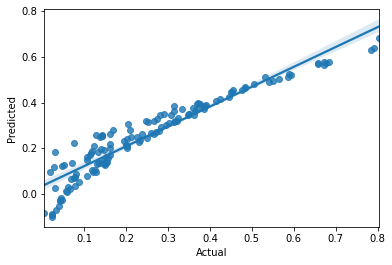

In [8]:
#Plotting actual against predicted values
sns.regplot(data=df, x="Actual", y="Predicted")
plt.show()

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0448614437320704
Mean Squared Error: 0.003702192214587743


<IPython.core.display.Javascript object>

Root Mean Squared Error: 0.06084564252752816
